<a href="https://colab.research.google.com/github/PandeyChhaya/Concepts-and-Technology-of-AI/blob/main/Worksheet%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download the Pima Indian Diabetes Dataset:

Available from sources like Kaggle.

Contains columns such as:

Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

(whether the patient has diabetes or not.)

In [3]:
import pandas as pd
file = '/content/drive/My Drive/diabetes.csv'
data= pd.read_csv(file)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Regression Task:

Predict the Blood Pressure of the patients based on other features.

Use Linear Regression model from Scikit-learn.

Once Build Evaluate the Model Appropriately.

Regression - Mean Squared Error: 286.22671038659206
Regression - R-squared: 0.12552834735164997


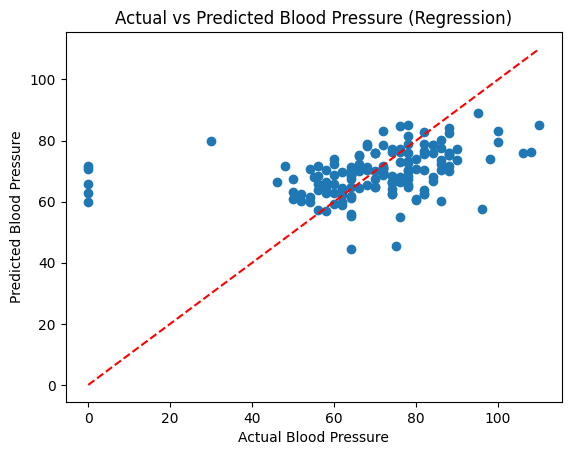

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data.isnull().sum()
data.fillna(data.median(), inplace=True)
X = data.drop('BloodPressure', axis=1)
Y = data['BloodPressure']

X_class = data.drop('Outcome', axis=1)
Y_class = data['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X_class, Y_class, test_size=0.2, random_state=40)

model = LinearRegression()

model.fit(X_train, Y_train)

Y_prediction_regression = model.predict(X_test)

meanSquaredError = mean_squared_error(Y_test, Y_prediction_regression)
r2_regression = r2_score(Y_test, Y_prediction_regression)

print(f"Regression - Mean Squared Error: {meanSquaredError}")
print(f"Regression - R-squared: {r2_regression}")

plt.scatter(Y_test, Y_prediction_regression)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Blood Pressure')
plt.ylabel('Predicted Blood Pressure')
plt.title('Actual vs Predicted Blood Pressure (Regression)')
plt.show()


Classification Task:

Predict whether the patient has diabetes (target column: Outcome).

Use Logistic Regression or K-Nearest Neighbors (KNN) model.

Once Build Evaluate the Model Appropriately.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

model_class = LogisticRegression(max_iter=500)
model_class.fit(X_train, Y_train)

Y_prediction_class = model_class.predict(X_test)

accuracy = accuracy_score(Y_test_class, Y_prediction_class)
confusion = confusion_matrix(Y_test_class, Y_prediction_class)
class_report = classification_report(Y_test_class, Y_prediction_class)

print(f" Accuracy: {accuracy}")
print(f" Confusion:\n{confusion}")
print(f" Classification Report:\n{class_report}")


model_class_knn = KNeighborsClassifier(n_neighbors=5)
model_class_knn.fit(X_train_class, Y_train_class)

Y_prediction_class_knn = model_class_knn.predict(X_test_class)

accuracy_knn = accuracy_score(Y_test_class, Y_prediction_class_knn)
confusion_matrix_knn = confusion_matrix(Y_test_class, Y_prediction_class_knn)
class_report_knn = classification_report(Y_test_class, Y_prediction_class_knn)

print(f" Accuracy: {accuracy_knn}")
print(f" Confusion Matrix:\n{confusion_matrix_knn}")
print(f" Classification Report:\n{class_report_knn}")


 Accuracy: 0.06493506493506493
 Confusion:
[[10  0  1  1 14  2  1 17 22  2 10  1  3 10  0  0  1  0  0]
 [10  0  0  0  0  1  1  0 26  0 11  3  0  3  1  1  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true s